<a href="https://colab.research.google.com/github/mangsshinde/auto_img_capt/blob/master/Automatic_Image_Captioning_10%2C000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mangsshinde","key":"1c002ab573284da68bf701a58aaeaf7e"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                 title                                  size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  ------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ruchi798/data-science-job-salaries                  Data Science Job Salaries               7KB  2022-06-15 08:59:12          16404        517  1.0              
faryarmemon/usa-housing-market-factors              U.S. Housing Market Factors            32KB  2022-08-03 02:19:31            293         24  1.0              
zzettrkalpakbal/full-filled-brain-stroke-dataset    Brain stroke prediction dataset        52KB  2022-07-16 09:57:08           1751         56  0.9705882        
himanshunakrani/student-study-hours                 Student Study Hours                    276B  2022-07-20 13:17:29           1304         50  1.0              
jillanisofttech/brain-stroke

In [8]:
!kaggle datasets download -d hsankesara/flickr-image-dataset

100% 8.15G/8.16G [02:42<00:00, 55.0MB/s]
100% 8.16G/8.16G [02:42<00:00, 53.8MB/s]


In [9]:
!unzip flickr-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5354911151.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/535529555.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5356236664.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5356318668.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/535830521.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5359437945.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5361355399.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/53614287.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/536147209.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5361551308.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/536156200.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/

In [10]:
from os import listdir
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

In [11]:
# extrat Features
def extract_features(directory):
    
    model = VGG16()
    
    #remove last layer
    model.layers.pop()
    
    model = Model(inputs = model.inputs , outputs = model.layers[-1].output)
    
    print(model.summary())
    
    features = dict()
    
    for name in listdir(directory):
        if 'jpg' not in name:
          continue
        else:
        # load and image
          filename = directory + '/' + name
          image = load_img(filename , target_size=(224 , 224))
        
          image = img_to_array(image)
        
          image = image.reshape((1 , image.shape[0] , image.shape[1] ,image.shape[2]))
        
          image = preprocess_input(image)
        
          feature = model.predict(image , verbose = 0)
        
          # get image id
          image_id = name.split(".")[0]
        
          # store features
          features[image_id] = feature
        
          print(name)
        
    return features

In [12]:
directory = '/content/flickr30k_images/flickr30k_images'
features = extract_features(directory)
print('extracted features :',len(features))
dump(features , open('features.pkl' , 'wb'))

Streaming output truncated to the last 5000 lines.
3240519143.jpg
3040033126.jpg
4694259841.jpg
3534952095.jpg
5291613581.jpg
540436782.jpg
6225843702.jpg
4910373302.jpg
2309779665.jpg
3413669228.jpg
2647755755.jpg
2611062891.jpg
2186087673.jpg
3551003620.jpg
3099965396.jpg
7988239633.jpg
409198440.jpg
2183468990.jpg
2644302353.jpg
276388524.jpg
4912320463.jpg
4672034241.jpg
4857773168.jpg
4655558667.jpg
4703514466.jpg
3197715961.jpg
2311850831.jpg
4888123485.jpg
3458577912.jpg
4931443661.jpg
5214344526.jpg
3032235201.jpg
3755945880.jpg
2528547068.jpg
363503753.jpg
2781967479.jpg
7862746246.jpg
3427118504.jpg
3074842262.jpg
2575887239.jpg
3891886294.jpg
3028530557.jpg
4871750892.jpg
976581518.jpg
4329263730.jpg
489865145.jpg
3396043950.jpg
3738551665.jpg
1043910339.jpg
369893824.jpg
160805827.jpg
4159174548.jpg
6599471759.jpg
4702827072.jpg
7245395668.jpg
6021205363.jpg
40670061.jpg
6545713889.jpg
3193335577.jpg
3484842724.jpg
13615892.jpg
4951904588.jpg
86120569.jpg
6483566713.jpg
356

In [13]:
import pandas as pd
import nltk
import re
from nltk.stem import WordNetLemmatizer

In [14]:
lemma = WordNetLemmatizer()

def load_decriptions(doc):
    mapping = dict()
    
    for i in range(len(doc)):
        image_id = doc['image_id'][i]
        image_desc = doc['desc'][i]
        
        if image_id not in mapping:
            mapping[image_id] = list()
        
        mapping[image_id].append(image_desc)
        
    return mapping

def clean_text(desc):
    
    # clean punctuation
    desc = re.sub(r'[^\w\s]' ,'', desc)
    
    # tokenize the words
    desc = desc.split()
    
    # convert to lower case
    desc = [token.lower() for token in desc]
    
    # lemmatization
    desc = [lemma.lemmatize(token) for token in desc]
    
    # remove numerical values
    desc = [token for token in desc if token.isalpha()]
    
    # join whole token
    desc = ' '.join(desc)
    
    return desc

In [15]:
# convert loaded descriptions into vocablury
def to_vocabluary(descriptions):
    all_desc = set()
    
    for key in descriptions.keys():
        [all_desc.update(str(d).split()) for d in descriptions[key] if type(d) != 'str']
        
    return all_desc

def save_descriptions(descriptions , filename):
    lines = list()
    
    for key , desc_list in descriptions.items():
        for desc in desc_list:
            lines.append(str(key) +' '+ str(desc))
            
    data = '\n'.join(lines)
    file = open(filename , 'w')
    file.write(data)
    file.close()

In [16]:
descriptions = pd.read_csv('/content/flickr30k_images/results.csv' , sep='|')

In [17]:
descriptions.columns = ['image_id','no','desc']

In [18]:
descriptions.head()

image_id  no                                               desc
0  1000092795.jpg   0   Two young guys with shaggy hair look at their...
1  1000092795.jpg   1   Two young , White males are outside near many...
2  1000092795.jpg   2   Two men in green shirts are standing in a yard .
3  1000092795.jpg   3       A man in a blue shirt standing in a garden .
4  1000092795.jpg   4            Two friends enjoy time spent together .

In [19]:
type(descriptions['no'][0])


str

In [20]:
desc_map = load_decriptions(descriptions) # image name with Its captions

In [21]:
vocabulary = to_vocabluary(desc_map)

In [22]:
len(vocabulary)

23457

In [23]:
save_descriptions(desc_map , 'descriptions.txt')

In [24]:
from pickle import load


In [25]:
def load_doc(filename):
    file = open(filename , 'r')
    text = file.read()
    file.close()
    return text

# this function is used for to get train image description from our dataset

def load_clean_descriptions(filename , dataset):
    doc = load_doc(filename)
    descriptions = dict()
    
    for line in doc.split('\n'):
        tokens = line.split()
        image_id , image_desc = tokens[0] , tokens[1:]
        
        if image_id in dataset:
            
            if image_id not in descriptions:
                descriptions[image_id] = list()
            
            # we add two tage at start and at end of the descitpion to identify to start and 
            # end of desc.
            desc = 'startseq '+ ' '.join(image_desc)+ ' endseq'
            descriptions[image_id].append(desc)
            
    return descriptions


# laod photo features
def load_photo_features(filename , dataset):
    all_features = load(open(filename,'rb'))
    features = {k+'.jpg' : all_features[k] for k in dataset}
    return features

In [26]:
train = set(descriptions['image_id'][:50000])
print('len of train image',len(train))

len of train image 10000


In [27]:
train_descriptions = load_clean_descriptions('descriptions.txt' , train)

In [28]:
print('len of train descriptions' , len(train_descriptions))

len of train descriptions 10000


In [29]:
train = pd.DataFrame(train)

In [30]:
train2 = train[0].apply(lambda x : x.replace('.jpg' , '')) # remove jpg sign

In [31]:
# train features means feautures from training images
train_features = load_photo_features('features.pkl' , train2)
print('photos train :',len(train_features))

photos train : 10000


In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [33]:
# convert dictonary to lis descriptions

def to_lines(descriptions):
    all_desc = list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
        
    return all_desc

# fit tokenizer on descriptions
def create_tokenizer(descriptions):
    lines = to_lines(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [34]:
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('vocab size' , vocab_size)

vocab size 11211


In [35]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np

In [36]:
# calculate the length with most words
def max_length(descriptions):
    lines = to_lines(descriptions)
    return max([len(line.split())for line in lines])
    
# create sequences of images,input sequences and output sequences
def create_sequences(tokenizer , max_length , desc_list , photo):
    X1 , X2 , y = list() , list() , list()
    
    for desc in desc_list:
        # convert words to number value
        seq = tokenizer.texts_to_sequences([desc])[0]
        
        for i in range(1, len(seq)):
            
            in_seq , output_seq = seq[:i] , seq[i]
            in_seq = pad_sequences([in_seq] , maxlen = max_length)[0]
            output_seq = to_categorical([output_seq] , num_classes = vocab_size)[0]
            
            X1.append(photo)
            X2.append(in_seq)
            y.append(output_seq)
            
    return np.array(X1) , np.array(X2) , np.array(y)

In [37]:
from keras.models import Model
from keras.layers import Input , Dense , LSTM , Embedding , Dropout
from keras.layers.merge import add
from keras.callbacks import EarlyStopping

In [38]:
def define_Model(vocab_size , max_length):
    
    # feature extractor model
    inputs1 = Input(shape=(1000 , ))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(512 , activation='relu')(fe1)
    fe3 = Dense(256 , activation = 'relu')(fe2)
    
    # sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size,512,mask_zero=True )(inputs2) # mask_zero = ignore padding
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(512 , return_sequences=True)(se2)
    se4 = Dropout(0.5)(se3)
    se5 = LSTM(256)(se4)
    
    
    #decoder Model
    decoder1 = add([fe3 , se5])
    decoder2 = Dense(256 , activation='relu')(decoder1)
    decoder3 = Dense(512 , activation='relu')(decoder2)
    outputs = Dense(vocab_size , activation='softmax')(decoder3)
    
    # combine both image and text
    model = Model([inputs1 , inputs2] , outputs)
    model.compile(loss='categorical_crossentropy' , optimizer = 'adam')
    
    # summary
    print(model.summary())
    
    return model

In [39]:
# below code progressivly load the code in batches
def data_generator(descriptions , photos , tokenizer , max_length):
    while 1:
        for key , desc_list in descriptions.items():
            photo = photos[key][0]
            in_img , in_seq , out_seq = create_sequences(tokenizer , max_length , desc_list , photo)
            
            yield[[in_img , in_seq] , out_seq]

In [40]:
print('len :', len(train))
print('Descriptions :',len(train_descriptions))
print('photos train :',len(train_features))
print('Vocabulary size :',vocab_size)
max_len = max_length(train_descriptions)
print('Description max length :', max_len)

len : 10000
Descriptions : 10000
photos train : 10000
Vocabulary size : 11211
Description max length : 84


In [41]:
from keras.models import load_model

In [42]:
model = define_Model(vocab_size , max_len)
epochs = 3
steps = len(train_descriptions)

for i in range(epochs):
    generator = data_generator(train_descriptions , train_features , tokenizer , max_len)
    
    model.fit(generator , epochs = 1 , steps_per_epoch = steps , verbose = 1)
    
    model.save('model_'+ str(i+1) + '.h5')

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 84)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 84, 512)      5740032     ['input_3[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 dropout_1 (Dropout)            (None, 84, 512)      0           ['embedding[0][0]']              
                                                                                            

In [43]:
def word_for_id(integer , tokenizer):
    for word,index in tokenizer.word_index.items():
        if index == integer:
            return word

In [44]:
def generate_desc(model , tokenizer , photo , max_length):
    
    input_text = 'startseq'
    
    for i in range(max_length):
        
        sequence = tokenizer.texts_to_sequences([input_text])[0]
        sequence = pad_sequences([sequence] , maxlen=max_length)
        
        # predict the next word
        next_word_id = model.predict([photo,sequence],verbose = 0)
        
        # get highest probality word from list of words
        next_word_id = np.argmax(next_word_id)
        
        # get word from id
        word = word_for_id(next_word_id , tokenizer)
        
        if word is None:
            break
            
        # update input text
        input_text += ' '+ word
        
        if word == 'endseq':
            break
            
    return input_text

In [45]:
from nltk.translate.bleu_score import corpus_bleu

In [46]:
def evaluate_model(model , desciptions , photos , tokenizer , max_length):
    actual , predicted = list() , list()
    
    for key , desc_list in desciptions.items():
        generated_desc = generate_desc(model , tokenizer , photos[key] , max_length)
        
        references = [d.split() for d in desc_list]
        actual.append(references)
        predicted.append(generated_desc.split())
    
    print('Bleu_Score -1 = %f'%corpus_bleu(actual , predicted , weights=(1,0,0,0)))
    
    print('Bleu_Score -2 = %f'%corpus_bleu(actual , predicted , weights=(0.5,0.5,0,0)))
    
    print('Bleu_Score -3 = %f'%corpus_bleu(actual , predicted , weights=(0.33,0.33,0.33,0))) 
    
    print('Bleu_Score -4 = %f'%corpus_bleu(actual , predicted , weights=(0.25,0.25,0.25,0.25)))

In [47]:
test = set(descriptions['image_id'][50000:62500])

In [48]:
test_descriptions = load_clean_descriptions('descriptions.txt',test)

In [49]:
test = pd.DataFrame(test)
test2 = test[0].apply(lambda x : x.replace('.jpg' , '')) # remove jpg sign

In [50]:
test_features = load_photo_features('features.pkl',test2)

In [51]:
from keras.models import load_model

In [52]:
filename = 'model_1.h5'

In [53]:
model = load_model(filename)

In [54]:
print('len of test dataset',len(test))
print('len of Descriptions',len(test_descriptions))
print('len of Test features',len(test_features))

len of test dataset 2500
len of Descriptions 2500
len of Test features 2500


In [ ]:
# evaluate_model(model , test_descriptions , test_features , tokenizer , max_len)

KeyboardInterrupt: ignored

In [55]:
dump(tokenizer , open('tokenizer.pkl','wb'))

In [56]:
import numpy as np
import pandas as pd

In [57]:
from keras.models import load_model
from pickle import load
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.preprocessing.sequence import pad_sequences

In [58]:
def word_for_id(integer , tokenizer):
    for word,index in tokenizer.word_index.items():
        if index == integer:
            return word
        
def generate_desc(model , tokenizer , photo , max_length):
    
    input_text = 'startseq'
    
    for i in range(max_length):
        
        sequence = tokenizer.texts_to_sequences([input_text])[0]
        sequence = pad_sequences([sequence] , maxlen=max_length)
        
        # predict the next word
        next_word_id = model.predict([photo,sequence],verbose = 0)
        
        # get highest probality word from list of words
        next_word_id = np.argmax(next_word_id)
        
        # get word from id
        word = word_for_id(next_word_id , tokenizer)
        
        if word is None:
            break
            
        # update input text
        input_text += ' '+ word
        
        if word == 'endseq':
            break
            
    return input_text

In [59]:
def extract_features_for_one_image(filename):
    model = VGG16()
    model.layers.pop()
    
    model = Model(inputs = model.inputs , outputs = model.layers[-1].output)
    
    image = load_img(filename , target_size=(224,224))
    
    image = img_to_array(image)
    
    image = image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))
    
    image = preprocess_input(image)
    
    feature = model.predict(image , verbose = 0)
    
    return feature

In [60]:
def get_image_caption(filename,model):
    tokenizer = load(open('tokenizer.pkl','rb'))
    photo = extract_features_for_one_image(filename)
    desc = generate_desc(model , tokenizer , photo , 84)
    desc = desc.replace('startseq','')
    desc = desc.replace('endseq','')
    return desc.title()

In [61]:
model2 = load_model('model_1.h5')

In [62]:
from IPython.display import Image,display

 A Man In A Blue Shirt Is Standing On A Street 


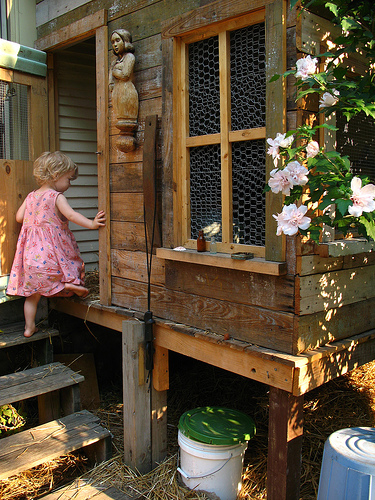

In [64]:
filename = 'test_image.jpg'
print(get_image_caption(filename,model2))
display(Image(filename))

 A Man In A Blue Shirt Is Standing On A Beach 


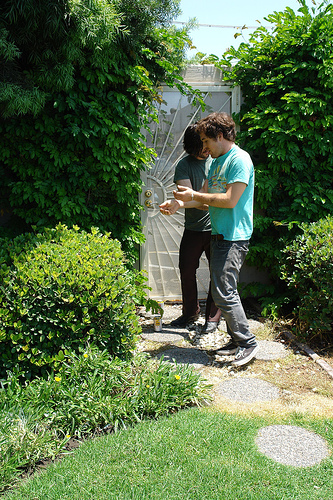

In [65]:
filename = 'test_image_2.jpg'
print(get_image_caption(filename,model2))
display(Image(filename))

 A Man In A Blue Shirt Is Standing On A Street 


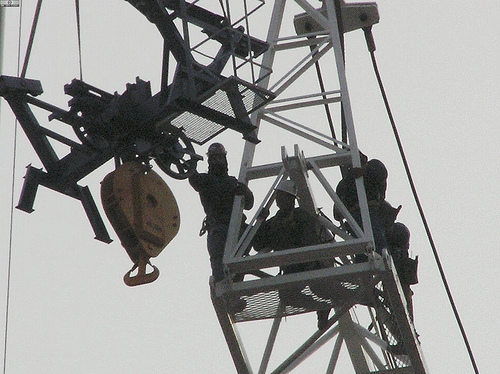

In [66]:
filename = '/content/test_image_1.jpg'
print(get_image_caption(filename,model2))
display(Image(filename))